# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [51]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [52]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# city = 'Paris'
# response = requests.get(query_url + city).json()
# cities = ['Paris']

# set up lists to hold reponse info
city_list = []
cloudiness_list =[]
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []


# Loop through the list of cities and perform a request for data on each
print ("Beginning Data Retrieval\n-----------------------------")
cnt = 0
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        cloudiness_list.append(response['clouds']['all'])
        country_list.append(response['sys']['country'])
        date_list.append(response['dt'])
        humidity_list.append(response['main']['humidity'])
        lat_list.append(response['coord']['lat'])
        lng_list.append(response['coord']['lon'])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response['wind']['speed'])
        city_list.append(city)
        cnt += 1
        print (f"Processing Record {cnt} | {city}")
    except:
        print (f"City not found. Skipping...")
print ("-----------------------------\nData Retrieval Complete\n-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 | mataura
Processing Record 2 | nakasongola
Processing Record 3 | bay roberts
Processing Record 4 | vao
Processing Record 5 | avarua
Processing Record 6 | florianopolis
City not found. Skipping...
Processing Record 7 | ushuaia
Processing Record 8 | teya
Processing Record 9 | taksimo
City not found. Skipping...
Processing Record 10 | evensk
Processing Record 11 | hasaki
Processing Record 12 | ginda
Processing Record 13 | bluff
Processing Record 14 | tuktoyaktuk
City not found. Skipping...
Processing Record 15 | spas-demensk
Processing Record 16 | bathsheba
Processing Record 17 | chuy
Processing Record 18 | thompson
Processing Record 19 | cherskiy
Processing Record 20 | bethel
Processing Record 21 | yulara
Processing Record 22 | butaritari
Processing Record 23 | belmonte
Processing Record 24 | hithadhoo
Processing Record 25 | kloulklubed
Processing Record 26 | sorong
Processing Record 27 | rawatsar
Processing Reco

Processing Record 226 | straja
Processing Record 227 | san patricio
Processing Record 228 | lasa
Processing Record 229 | jacareacanga
Processing Record 230 | vila velha
Processing Record 231 | ponta do sol
City not found. Skipping...
City not found. Skipping...
Processing Record 232 | seoul
Processing Record 233 | fare
Processing Record 234 | itaituba
Processing Record 235 | cervo
Processing Record 236 | comodoro rivadavia
Processing Record 237 | tiksi
Processing Record 238 | dingle
Processing Record 239 | hirara
Processing Record 240 | yeppoon
Processing Record 241 | mailsi
City not found. Skipping...
Processing Record 242 | collie
Processing Record 243 | tarrafal
Processing Record 244 | muros
Processing Record 245 | nurmahal
Processing Record 246 | honiara
Processing Record 247 | severo-kurilsk
Processing Record 248 | santa fe
Processing Record 249 | yerbogachen
Processing Record 250 | panaba
Processing Record 251 | nikolskoye
Processing Record 252 | pisco
Processing Record 253 | kia

Processing Record 450 | mattawa
Processing Record 451 | fairbanks
Processing Record 452 | synya
City not found. Skipping...
Processing Record 453 | marquette
Processing Record 454 | alta floresta
Processing Record 455 | gombong
Processing Record 456 | toppenish
Processing Record 457 | canon city
Processing Record 458 | taltal
Processing Record 459 | bilibino
Processing Record 460 | stara vyzhivka
Processing Record 461 | camacha
Processing Record 462 | cayambe
Processing Record 463 | chimore
Processing Record 464 | canutama
Processing Record 465 | massaguet
Processing Record 466 | gamba
Processing Record 467 | hoa binh
Processing Record 468 | sechura
Processing Record 469 | lloydminster
Processing Record 470 | meulaboh
Processing Record 471 | boende
Processing Record 472 | petropavlovsk-kamchatskiy
Processing Record 473 | chingirlau
Processing Record 474 | ouargaye
Processing Record 475 | nuuk
Processing Record 476 | north myrtle beach
Processing Record 477 | mitu
Processing Record 478 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [57]:
weather_dict = {
    "City": city_list,
    "Cloudiness": cloudiness_list,
    "Country": country_list,
    "Date": date_list,
    "Humidity": humidity_list,
    "Lat": lat_list,
    "Lng": lng_list,
    "Max Temp": max_temp_list,
    "Wind Speed": wind_speed_list
}
print (weather_data.count())
weather_data = pd.DataFrame(weather_dict)

City          545
Cloudiness    545
Country       545
Date          545
Humidity      545
Lat           545
Lng           545
Max Temp      545
Wind Speed    545
dtype: int64


In [60]:
weather_data.to_csv("weather_data.csv", index=False)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mataura,92,NZ,1546740124,94,-46.19,168.86,58.07,8.30
1,nakasongola,44,UG,1546740124,76,1.32,32.46,67.30,7.07
2,bay roberts,90,CA,1546737480,86,47.58,-53.28,32.00,8.05
3,vao,76,EE,1546740125,87,59.10,26.19,18.07,3.15
4,avarua,75,CK,1546736400,61,-21.21,-159.78,82.40,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

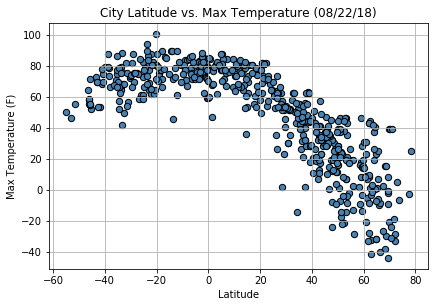

In [61]:
plt.scatter(weather_data['Lat'], weather_data['Max Temp'],facecolors='steelblue', edgecolors="black", s=40, alpha=1)
plt.grid()
plt.tight_layout()
plt.title('City Latitude vs. Max Temperature (08/22/18)')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("../Images/Lat_vs_Maxtemp.jpg")

#### Latitude vs. Humidity Plot

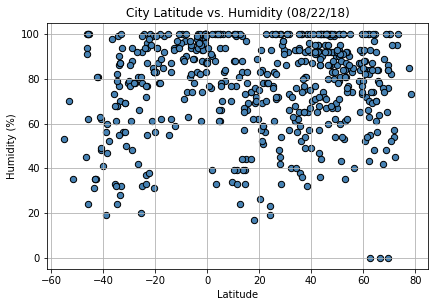

In [62]:
plt.scatter(weather_data['Lat'], weather_data['Humidity'],facecolors='steelblue', edgecolors="black", s=40, alpha=1)
plt.grid()
plt.tight_layout()
plt.title('City Latitude vs. Humidity (08/22/18)')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../Images/Lat_vs_Hum.jpg")

#### Latitude vs. Cloudiness Plot

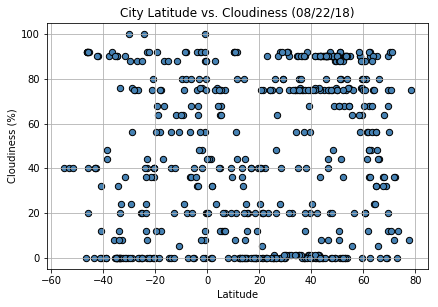

In [63]:
plt.scatter(weather_data['Lat'], weather_data['Cloudiness'],facecolors='steelblue', edgecolors="black", s=40, alpha=1)
plt.grid()
plt.tight_layout()
plt.title('City Latitude vs. Cloudiness (08/22/18)')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../Images/Lat_vs_Cloud.jpg")

#### Latitude vs. Wind Speed Plot

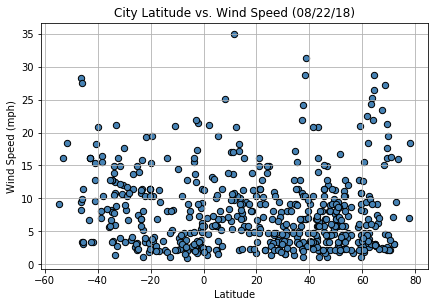

In [64]:
plt.scatter(weather_data['Lat'], weather_data['Wind Speed'],facecolors='steelblue', edgecolors="black", s=40, alpha=1)
plt.grid()
plt.tight_layout()
plt.title('City Latitude vs. Wind Speed (08/22/18)')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../Images/Lat_vs_Wind.jpg")

In [ ]:
# The temperature is higher in the cities near the equator than those are far away.
# No obvious relationship is found between latitude and the humidity. It seems like there are always cities that have very high humidities in all the latitudes.
# No obvious relationship is found between latitude and the cloudiness. 
# No obvious relationship is found between latitude and the wind speed. It seems like most of the cities are with <10 mph wind speed. 